# 1. For the data set you have chosen and the binary categorical response variable that you had chosen for Check-In 3 for a logistic regression or another binary variable in your data set, apply the KNN algorithm or Random Forest Algorithm for classification.(The variable chosen does not have to be directly related to the final goal of your project.)

For Check_in 3 we binarize the response variable Exam_score which define Exam_score >= 67 as Highscore which in class 1 and Exam_score < 67 as class 0. features we used are ['Hours_Studied', 'Attendance', 'Previous_Scores']. I will apply KNN algorithm for classification.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             roc_curve, auc, roc_auc_score, RocCurveDisplay)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
TH = 0.51
df = pd.read_csv("/content/Cleaned_StudentPerformanceFactors.csv")

df['HighScore'] = (df['Exam_Score'] >= 67).astype(int)
print(df['HighScore'].value_counts())


HighScore
1    3610
0    2768
Name: count, dtype: int64


In [17]:
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores']]
y = df['HighScore']
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [18]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 21))
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

print("Best k:", grid.best_params_["knn__n_neighbors"])
print("CV best accuracy:", grid.best_score_)

Best k: 19
CV best accuracy: 0.8465514037933304


# 2. Calculate the confusion matrix, prediction accuracy, prediction error, true positive rate, and true negative rate, and F1 score on your training data set.

In [20]:
best_model = grid.best_estimator_

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

cm = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = cm.ravel()

tpr  = tp / (tp + fn)
tnr  = tn / (tn + fp)

print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Error:", 1 - accuracy_score(y_val, y_val_pred))
print("TPR:", tpr)
print("TNR:", tnr)
print("F1 score:", 2 * tp / (2 * tp + fp + fn))

Confusion matrix:
 [[685 146]
 [148 935]]
Accuracy: 0.8463949843260188
Error: 0.15360501567398122
TPR: 0.863342566943675
TNR: 0.8243080625752106
F1 score: 0.8641404805914972


# 3. Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation on the validation set to calculate the AUC and accuracy of each fold.

Validation AUC: 0.9260894493501473


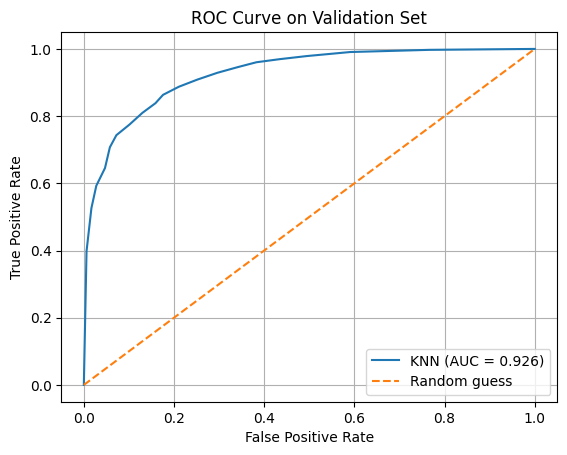

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_val_proba = best_model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

auc_val = roc_auc_score(y_val, y_val_proba)
print("Validation AUC:", auc_val)

plt.figure()
plt.plot(fpr, tpr, label=f"KNN (AUC = {auc_val:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

val_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=19))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = cross_val_score(
    val_pipe, X_val, y_val,
    cv=cv,
    scoring="roc_auc"
)

acc_scores = cross_val_score(
    val_pipe, X_val, y_val,
    cv=cv,
    scoring="accuracy"
)

print("AUC per fold:", auc_scores)
print("Accuracy per fold:", acc_scores)
print("Mean AUC:", auc_scores.mean())
print("Mean Accuracy:", acc_scores.mean())


AUC per fold: [0.9168286  0.92683638 0.92204764 0.93092981 0.91444946]
Accuracy per fold: [0.81984334 0.85117493 0.84073107 0.8381201  0.81937173]
Mean AUC: 0.9222183783285687
Mean Accuracy: 0.8338482358891637
